**Objective:**
The objective of this assignment is to demonstrate the application of L1 (Lasso) and L2 (Ridge) regularization techniques in linear regression. You will implement these regularizations and apply optimization algorithms (such as Gradient Descent) to train models on a dataset.

**Problem Description:**
You are tasked with building a linear regression model with both L1 (Lasso) and L2 (Ridge) regularization to minimize overfitting. You will:

**Load a dataset.**
Split it into training and testing sets.
Implement L1 and L2 regularization.
Implement gradient descent optimization to minimize the loss.
Evaluate the models' performance on the test set.

**Dataset:**
You will use the California housing dataset. This dataset contains information about various attributes of homes in California and is often used for regression tasks.

**Features:** longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, etc.

**Target:** The target is the median house value.
You can load the dataset from the sklearn.datasets library.

**Steps:**



In [150]:
#1.Import Libraries and Load Dataset:Import necessary libraries and load the California housing dataset.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split



In [151]:
#2.Preprocessing:

housing_data = fetch_california_housing()
housing_df = pd.DataFrame(housing_data.data, columns= housing_data.feature_names)
housing_df['Target'] = housing_data.target
print(housing_df.head())
print(housing_df.shape)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
(20640, 9)


In [152]:
from warnings import filterwarnings
filterwarnings('ignore')

In [153]:
missing_counts = housing_df.isnull().sum()

# Display columns with missing values
print("Missing values per column:")
print(missing_counts[missing_counts > 0])

Missing values per column:
Series([], dtype: int64)


In [154]:
print(housing_df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

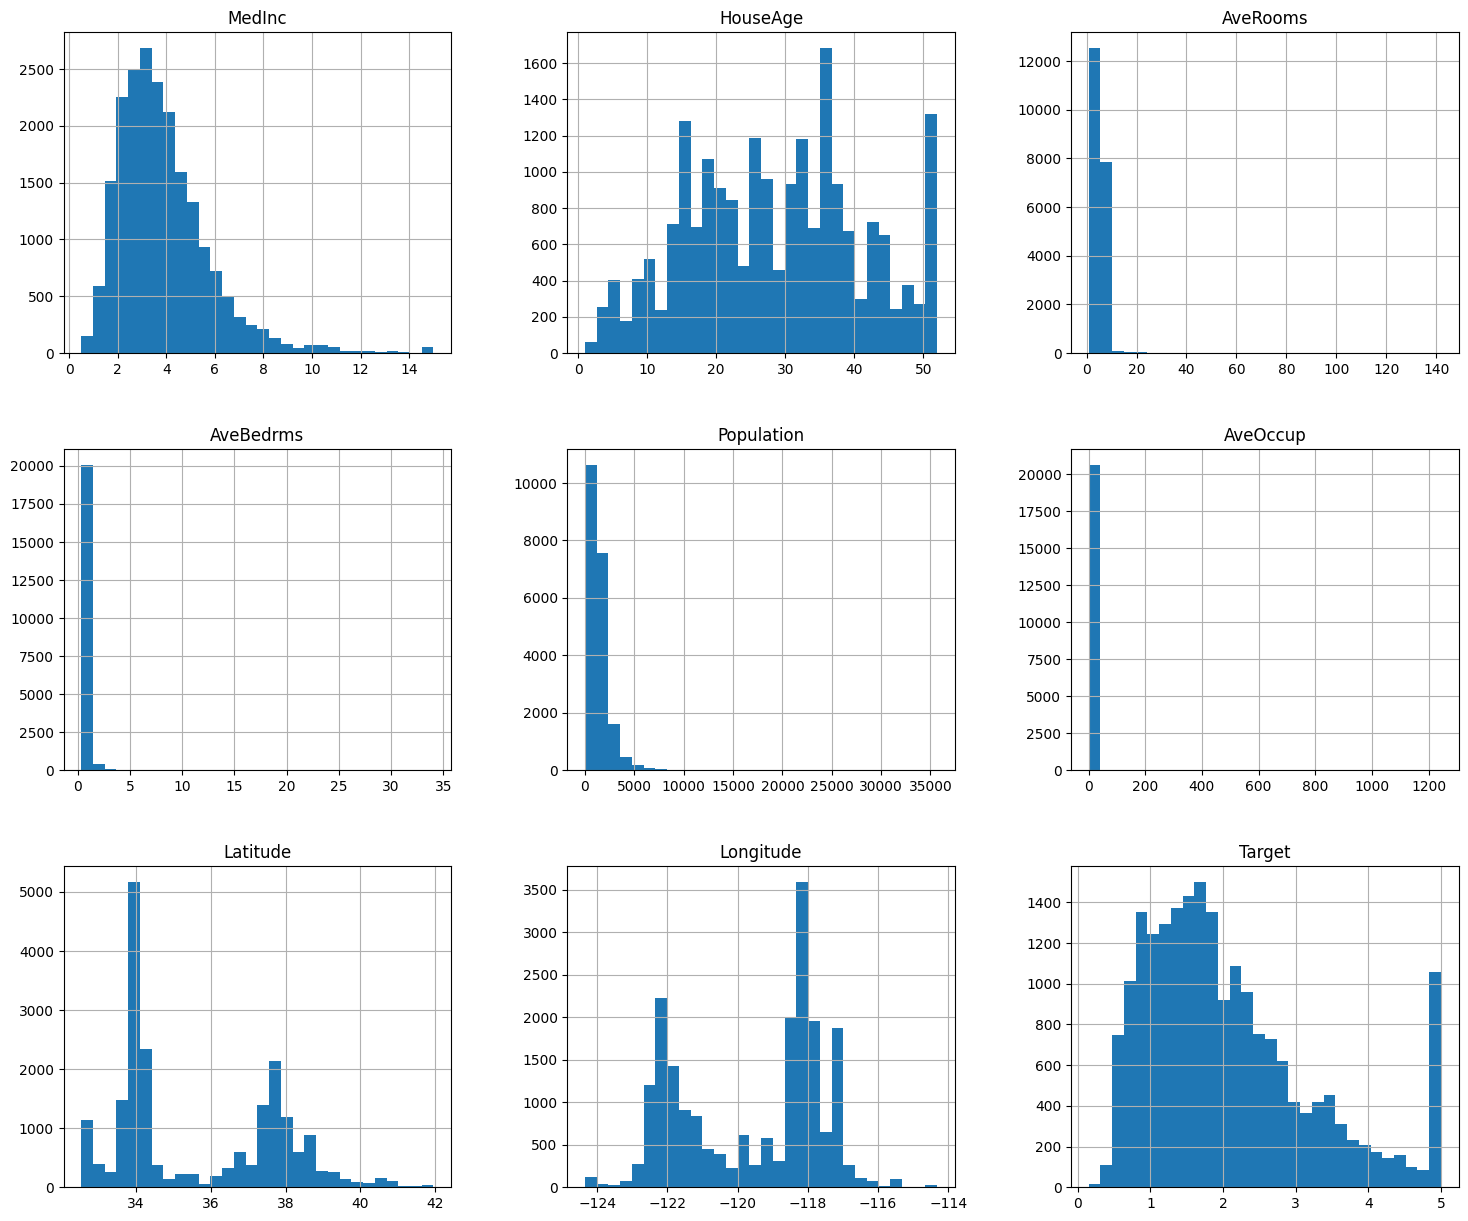

In [155]:
housing_df.hist(figsize=(18,15), bins=30)
plt.show()

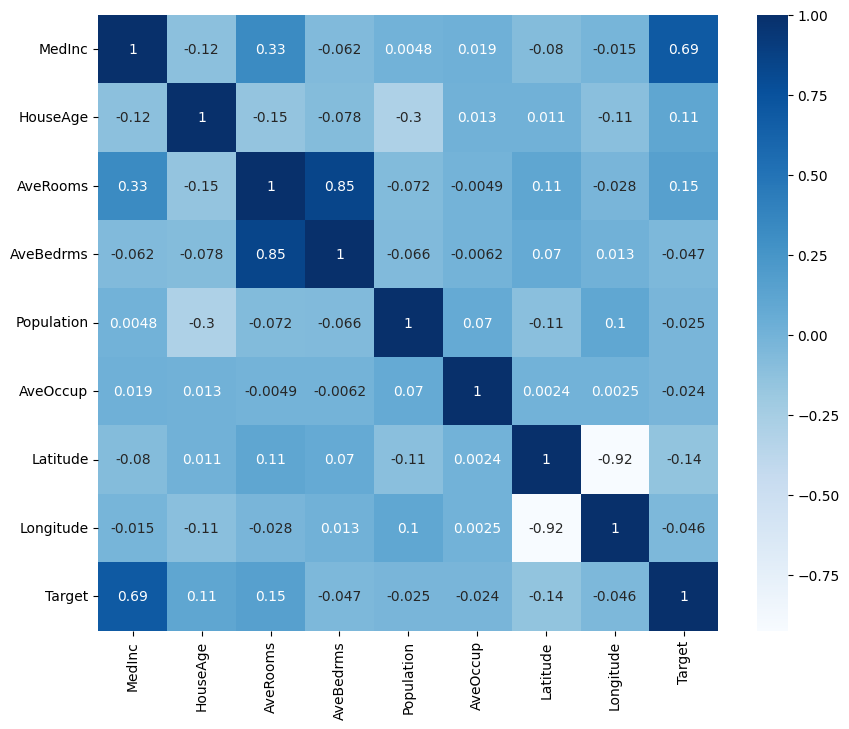

In [156]:
plt.figure(figsize=(10,8))
sns.heatmap(housing_df.corr(),annot=True,cmap='Blues')
plt.show()

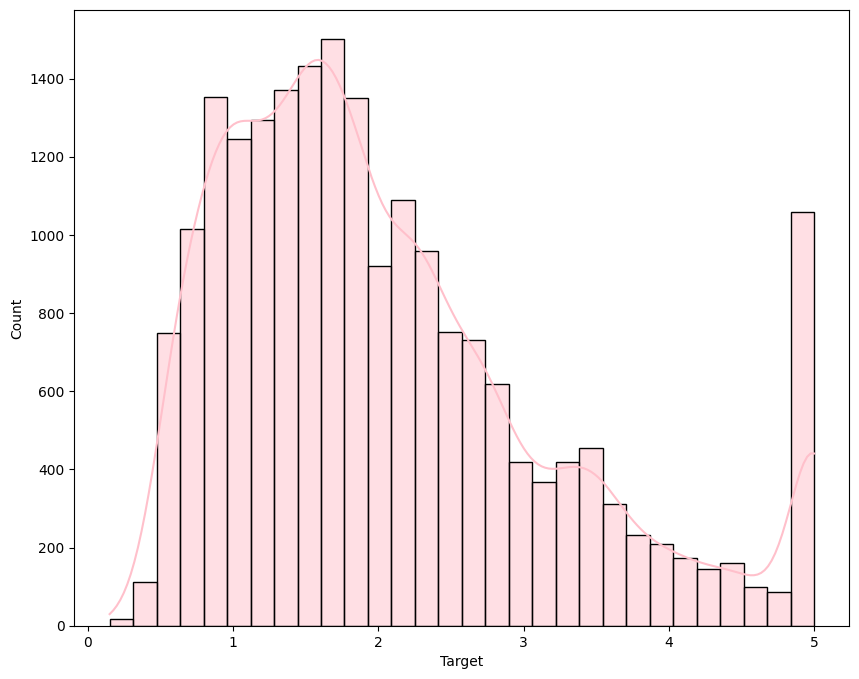

In [157]:
#Checking the Normality
plt.figure(figsize=(10,8))
sns.histplot(housing_df['Target'],kde='True',color='pink',bins=30)
plt.show()

In [158]:
from scipy.stats import shapiro
statistic, p_value = shapiro(housing_df['Target'])
print(f'Test statistic is {statistic:.5f}')
print(f'p value is {p_value:5f}')
alpha =0.05
if p_value < alpha:
   print('The data is not normally distributed. The hypothesis is rejected')
else:
  printf("The data is normally distributed. The hypothesis is accepted")

Test statistic is 0.91229
p value is 0.000000
The data is not normally distributed. The hypothesis is rejected


In [159]:
housing_df['log_Target'] = np.log(housing_df['Target'])
print(housing_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  log_Target  
0    -122.23   4.526    1.509839  
1    -122.22   3.585    1.276758  
2    -122.24   3.521    1.258745  
3    -122.25   3.413    1.227592  
4    -122.25   3.422    1.230225  


In [160]:
statistic_2, p_value_2= shapiro(housing_df['log_Target'])
print(f'Test statistic is {statistic_2:.5f}')
print(f'p value is {p_value_2:5f}')
alpha =0.05
if p_value_2 < alpha:
   print('The data is not normally distributed. The hypothesis is rejected')
else:
  printf("The data is normally distributed. The hypothesis is accepted")

Test statistic is 0.98763
p value is 0.000000
The data is not normally distributed. The hypothesis is rejected


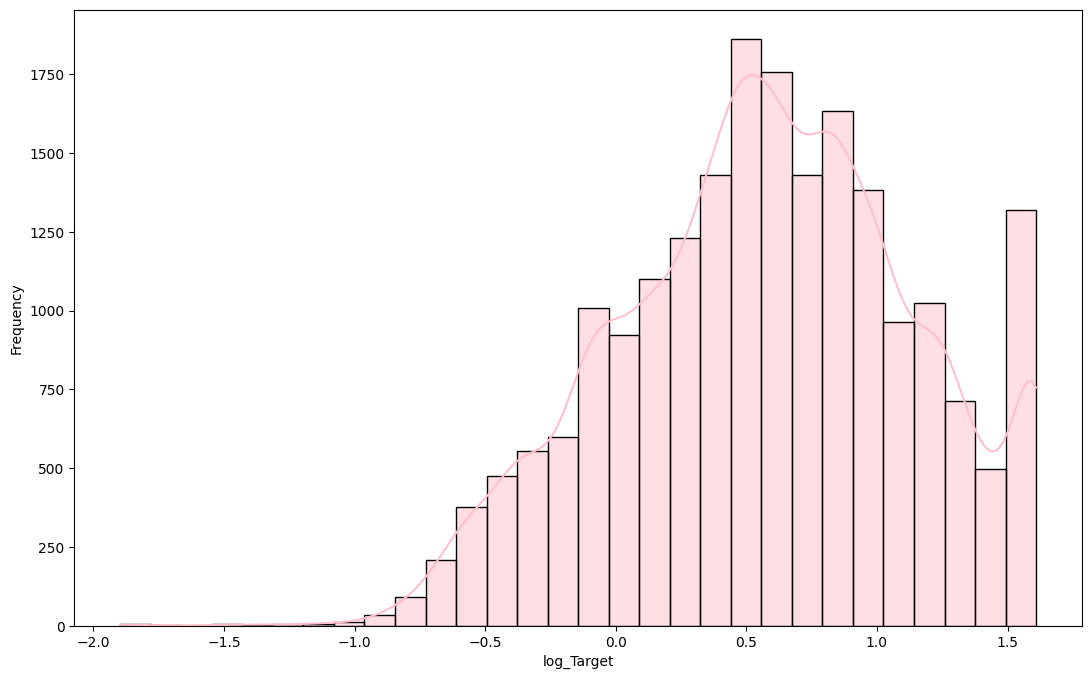

In [161]:
plt.figure(figsize=(13,8));
sns.histplot(housing_df['log_Target'],kde=True, color='pink', bins=30)
plt.xlabel('log_Target')
plt.ylabel('Frequency')
plt.show()

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state = 42)

X_train = train_df.drop(columns=["Target", "log_Target"], axis=1).values
y_train = train_df['log_Target'].values

X_test = test_df.drop(columns=["Target","log_Target"], axis=1).values
y_test = test_df['log_Target'].values

In [163]:

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=  scaler.transform(X_test)

X_train = np.c_[np.ones(X_train_s.shape[0]), X_train_s]
X_test = np.c_[np.ones(X_test_s.shape[0]), X_test_s ]

In [164]:
import numpy as np
#L1 Regularization (Lasso): Adds the absolute value of the coefficients to the cost function, leading to sparsity (some coefficients become zero).
def gradient_descent_l1(X, y, alpha=0.01, epochs=1000, lambda_=0.1):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize weights
    loss_history = []
    rmse_history = []

    for epoch in range(epochs):
        y_pred = np.dot(X, theta)  # Predictions
        error = y - y_pred  # Residuals

        # Compute loss (MSE + L1 penalty)
        loss = (1 / (2 * m)) * np.sum(error ** 2) + lambda_ * np.sum(np.abs(theta))
        loss_history.append(loss)

        # Compute RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        rmse_history.append(rmse)

        # Compute gradient (L1 penalty uses sign function)
        grad = np.dot(X.T, error) + lambda_ * np.sign(theta)

        # Update weights
        theta += (alpha / m) * grad

    return theta, loss_history, rmse_history


In [165]:
def gradient_descent_l2(X, y, alpha=0.01, epochs=1000, lambda_=0.1):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize weights
    loss_history = []
    rmse_history = []

    for epoch in range(epochs):
        y_pred = np.dot(X, theta)  # Predictions
        error = y - y_pred  # Residuals

        # Compute loss (MSE + L2 penalty)
        loss = (1 / (2 * m)) * np.sum(error ** 2) + lambda_ * np.sum(theta ** 2)
        loss_history.append(loss)

        # Compute RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        rmse_history.append(rmse)

        # Compute gradient (L2 penalty is 2 * lambda * theta)
        grad = np.dot(X.T, error) + 2 * lambda_ * theta

        # Update weights
        theta += (alpha / m) * grad

    return theta, loss_history, rmse_history



In [166]:
epochs = 5000
alpha = 0.01
lambda_ = 0.01

theta_l1, loss_history_l1, rmse_history_l1 = gradient_descent_l1(X_train, y_train, alpha, epochs, lambda_)
theta_l2, loss_history_l2, rmse_history_l2 = gradient_descent_l2(X_train, y_train, alpha, epochs, lambda_)


L1 Regularization Gradient:
∂/∂𝜃=𝑋T(𝑦−𝑦^)+𝜆⋅sign(𝜃)

L2 Regularization Gradient:
∂/∂𝜃=𝑋T(𝑦−𝑦^)+2𝜆⋅𝜃


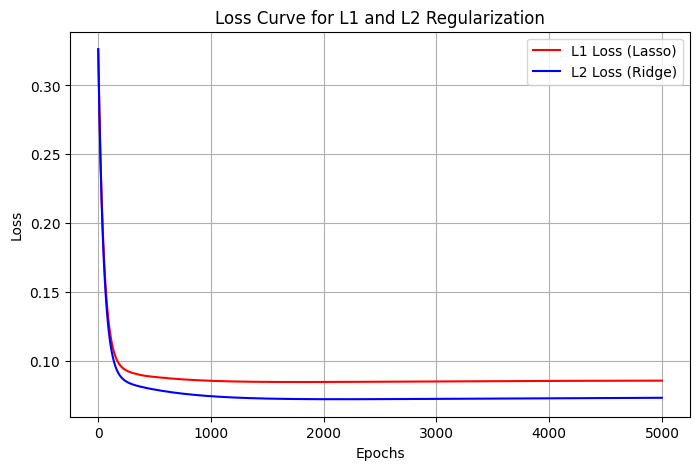

In [167]:
def plot_loss(loss_l1, loss_l2):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(loss_l1)), loss_l1, label="L1 Loss (Lasso)", color="red")
    plt.plot(range(len(loss_l2)), loss_l2, label="L2 Loss (Ridge)", color="blue")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve for L1 and L2 Regularization")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(loss_history_l1, loss_history_l2)



In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model_test(X_test, y_test, theta):
    # Predictions
    y_test_pred = np.dot(X_test, theta)

    # Compute MAE
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Compute MSE
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Compute RMSE
    rmse_test = np.sqrt(mse_test)

    # Compute R² Score
    r2_test = r2_score(y_test, y_test_pred)

    # Return results in a list
    return [mae_test, mse_test, rmse_test, r2_test]

# Example Usage
results_l1_test = evaluate_model_test(X_test, y_test, theta_l1)
results_l2_test = evaluate_model_test(X_test, y_test, theta_l2)

# Print results horizontally
print(f"{'Metric':<20} {'L1 Regularization':<20} {'L2 Regularization':<20}")
print("-" * 60)
metrics = ["MAE (Test)", "MSE (Test)", "RMSE (Test)", "R² (Test)"]
for i in range(len(metrics)):
    print(f"{metrics[i]:<20} {results_l1_test[i]:<20} {results_l2_test[i]:<20}")



Metric               L1 Regularization    L2 Regularization   
------------------------------------------------------------
MAE (Test)           0.270829366527712    0.27082939280591595 
MSE (Test)           0.1321753464273218   0.1321750990614369  
RMSE (Test)          0.36355927498459145  0.36355893478422024 
R² (Test)            0.5927626433507062   0.5927634054945689  


In [170]:
print("Theta for L1 (Lasso):", theta_l1)
print("Theta for L2 (Ridge):", theta_l2)




Theta for L1 (Lasso): [ 0.57356916  0.3738794   0.03355042 -0.10878185  0.13428116  0.01144032
 -0.01843944 -0.57412043 -0.54004087]
Theta for L2 (Ridge): [ 0.57356925  0.37387642  0.03354955 -0.10877557  0.13427535  0.01143943
 -0.01843871 -0.57412273 -0.54004273]


In [176]:
def evaluate_model(X_test, y_test, theta):
    y_test_pred = np.dot(X_test, theta)

    metrics = {
        "MSE (Test)": mean_squared_error(y_test, y_test_pred),
        "RMSE (Test)": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "MAE (Test)": mean_absolute_error(y_test, y_test_pred),
        "R² (Test)": r2_score(y_test, y_test_pred)
    }

    return metrics

In [179]:
# Lambda values to test
lambda_values = [0.01, 0.1, 1, 10, 100]

# Lists to store errors
errors_l1 = []
errors_l2 = []

# Training and testing loops for different lambda values
for lambda_ in lambda_values:
    theta_l1 , u, h= gradient_descent_l1(X_train, y_train, lambda_=lambda_)
    theta_l2,u,j = gradient_descent_l2(X_train, y_train, lambda_=lambda_)

    metrics_l1 = evaluate_model(X_test, y_test, theta_l1)
    metrics_l2 = evaluate_model(X_test, y_test, theta_l2)

    errors_l1.append(metrics_l1)
    errors_l2.append(metrics_l2)


In [180]:
print(f"{'Lambda':<10} {'MSE (Test)':<15} {'RMSE (Test)':<15} {'MAE (Test)':<15} {'R² (Test)':<15}")
print("=" * 70)

print("\nL1 Regularization (Lasso) Test Errors:")
print("-" * 70)
for i, lambda_ in enumerate(lambda_values):
    print(f"{lambda_:<10} {errors_l1[i]['MSE (Test)']:<15} {errors_l1[i]['RMSE (Test)']:<15} {errors_l1[i]['MAE (Test)']:<15} {errors_l1[i]['R² (Test)']:<15}")

print("\nL2 Regularization (Ridge) Test Errors:")
print("-" * 70)
for i, lambda_ in enumerate(lambda_values):
    print(f"{lambda_:<10} {errors_l1[i]['MSE (Test)']:<15} {errors_l1[i]['RMSE (Test)']:<15} {errors_l1[i]['MAE (Test)']:<15} {errors_l1[i]['R² (Test)']:<15}")


Lambda     MSE (Test)      RMSE (Test)     MAE (Test)      R² (Test)      

L1 Regularization (Lasso) Test Errors:
----------------------------------------------------------------------
0.01       0.1411532774963971 0.3757037097187052 0.2856135857593996 0.5651012903406712
0.1        0.14115049799686444 0.37570001064261954 0.28560970709369327 0.5651098540862796
1          0.14112276295774182 0.3756630976789467 0.28557097474792414 0.5651953068149779
10         0.1408513853967557 0.3753017258110542 0.2851978120165586 0.5660314315808825
100        0.13866944925336994 0.37238347070374905 0.28226876057866535 0.5727540612650692

L2 Regularization (Ridge) Test Errors:
----------------------------------------------------------------------
0.01       0.1411532774963971 0.3757037097187052 0.2856135857593996 0.5651012903406712
0.1        0.14115049799686444 0.37570001064261954 0.28560970709369327 0.5651098540862796
1          0.14112276295774182 0.3756630976789467 0.28557097474792414 0.56519530681

**Deliverables:**
1.Code for implementing L1 and L2 regularization with gradient descent.

2.Evaluation results (RMSE for both L1 and L2 models).

3.Visual representation of the cost history.

4.Discussion on the effect of regularization on model performance and overfitting.


NOTE
> Comments in Python code must be present explaining the necessary variables, functions, and

> In your Report, content should present or each Task with your observations and a final conclusion

> The Report should be made in latex and Tex files should be submitted too

